In [350]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms
import numpy as np
from layers import Linear, Sigmoid, NLLLoss, NeuralNetwork # Results from Seminar 1
from matplotlib.pyplot import figure
from PIL import Image

%matplotlib inline

In [311]:
np.mean(np.random.normal(size=10000))

-0.0031697223543654565

In [422]:
class AddNoise(object):
    def __init__(self, mean=0., std=0.2):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        tensor += torch.from_numpy(self.mean + self.std*
                                   np.random.normal(size=tensor.numpy().shape))
        return tensor
    
    def __repr__(self):
        return self.__class__.__name__ + '(mean={0}, std={1})'.format(self.mean, self.std)

In [423]:
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,)), 
                       AddNoise() 
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader_full = DataLoader(test_dataset, len(test_dataset), shuffle=True)
train_loader_full = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle=True)

In [424]:
im = 0
minimums = []
for X, y in train_loader:
    X = X.numpy()
    y = y.numpy()
    im = X[0]
    break

In [425]:
minimums.sort()

In [426]:
minimums[:10]

[]

In [427]:
np.mean(im)

-0.04817597

In [428]:
print(np.min(im), np.max(im))

-1.0741152 3.15558


In [429]:
im

array([[[-2.56385535e-01, -6.35112643e-01, -1.07411516e+00,
         -5.24928331e-01, -5.26791632e-01, -3.51095498e-01,
         -5.07170916e-01, -3.16836804e-01, -4.55547810e-01,
         -4.98199373e-01, -2.06483066e-01, -5.58935881e-01,
         -6.66975737e-01, -6.26139939e-02, -7.11073697e-01,
         -6.23150945e-01, -2.42673799e-01, -5.78622699e-01,
         -7.05358565e-01, -2.25984216e-01, -6.57803953e-01,
         -1.02727927e-01, -8.32710445e-01, -4.27038699e-01,
         -4.19409454e-01, -3.11972648e-01, -4.85410362e-01,
         -5.47648311e-01],
        [-4.27760005e-01, -6.44733429e-01,  5.93879959e-03,
         -2.00664014e-01, -2.53513634e-01, -1.25479847e-01,
         -4.67431813e-01, -4.71303672e-01, -1.97309211e-01,
         -7.11934149e-01, -2.78776824e-01, -4.18309234e-02,
         -3.14005435e-01, -7.39737988e-01, -4.92191732e-01,
         -3.67624193e-01, -3.60943854e-01, -6.34436250e-01,
         -7.88504630e-02, -4.34456974e-01, -2.71907806e-01,
         -3.9

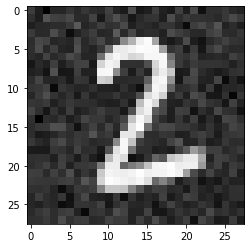

In [430]:
plt.imshow(im.reshape(28, 28), cmap=plt.cm.Greys_r)